##### <a id='top'></a>

# Confidence intervals and other things
***

 Andrew Hahn


In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
%matplotlib inline

###  Exploring Sea Level Data

Provided is a large set of data containing information of mean sea level from 1920 to 2015. Using this data, perform a a variety of tests to determine if sea levels are rising meaningfully over time.

In [56]:
# Local and web paths to the data; pick which works for you.
filepath = "sealevel_newyork.csv"
dfSL = pd.read_csv(filepath, header=None)
dfSL.rename(columns={0 : 'Year', 1 : 'Month', 2 : 'Day', 3 : 'SL'}, inplace=True)
dfSL.head(50)

,Year,Month,Day,SL
0,1920,6,2,1593
1,1920,6,3,1605
2,1920,6,4,1617
3,1920,6,5,1779
4,1920,6,6,1722
5,1920,6,7,1594
6,1920,6,8,1639
7,1920,6,9,1699
8,1920,6,10,1690
9,1920,6,11,1622


**Part A:**  Write a function `clean_data` to:
1. take in a single argument of a raw sea level data frame (e.g., `dfSL` above),
2. compute the fill-value used to replace missing sea level (SL) data (**not** hard-coded!),
3. use the Pandas `DataFrame.dropna` method to remove all missing rows of data, 
4. select only the data point on the second day of each month, and
4. return a cleaned Pandas data frame.

Use your shiny new function to clean the `dfSL` data frame and save the results in a new data frame.

There is a very specific reason to sample only one daily data point per month. We will talk about it later.

In [57]:
def clean_data(df):
    
    # your code goes here!
    dfClean=df.loc[df['Day'] == 2].replace(-32767,np.nan).dropna()
    
    return dfClean

dfClean = clean_data(dfSL)
dfClean.head(50)

,Year,Month,Day,SL
0,1920,6,2,1593.0
30,1920,7,2,1710.0
61,1920,8,2,1662.0
92,1920,9,2,1585.0
122,1920,10,2,1521.0
153,1920,11,2,1704.0
183,1920,12,2,1398.0
214,1921,1,2,1686.0
245,1921,2,2,1530.0
273,1921,3,2,1541.0


In [58]:
len(dfClean)

1003

**Part B:**  Plot the cleaned time series of sea levels. Be sure to label your axes, including units. The UHSLC data portal includes a link to the metadata accompanying our data set; if you are not sure about units, that would be a good place to start looking. For the $x$-axis, place the $x$ tick marks on January 1 of each year that is divisible by 10 (i.e., 1920, 1930, ...), and label with that year. You may need to do additional processing in order to grab these indices. 


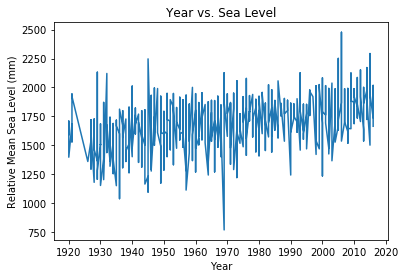

In [59]:
plt.title("Year vs. Sea Level")
plt.xlabel("Year")
plt.ylabel("Relative Mean Sea Level (mm)")  
plt.plot(dfClean["Year"],dfClean["SL"],"-")
plt.xticks(np.arange(1920, 2021, 10))
plt.show()

**Part C:** Use your cleaned sea levels data frame to create two new Pandas data frames or series:
1. one object to contain the sea levels between (and including) the years 1986 and 1995, and
2. another object to contain the sea levels between (and including) the years 2006 and 2015.

Then, create a single-panel figure that includes density histograms of each of the two decades of sea levels. Be sure to label everything appropriately.

Finally, based on the data in front of you, formulate and state a hypothesis about how the mean sea level in the decade 2006-2015 compares to the mean sea level in the decade 1986-1995.

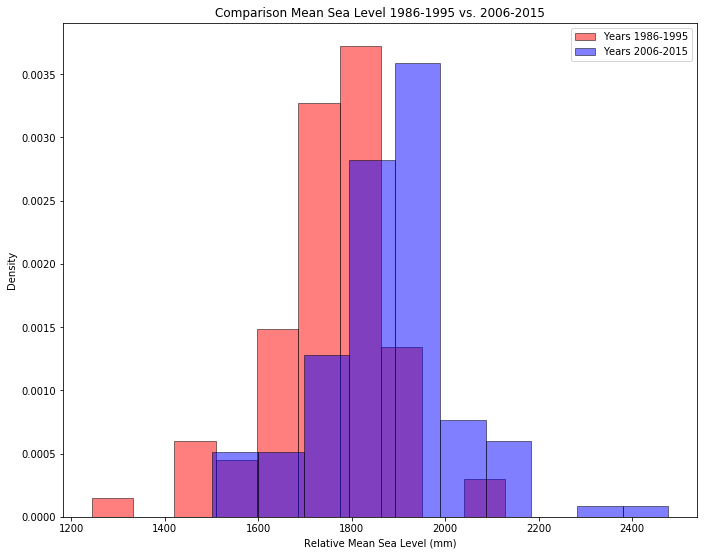

In [60]:
SL1=dfClean.loc[dfClean['Year'] >= 1986].loc[dfClean['Year']<=1995]
SL2=dfClean.loc[dfClean['Year'] >= 2006].loc[dfClean['Year']<=2015]
bins=np.arange(1986,2015,5)

fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(222)
ax.hist(SL1['SL'], color = 'red', label='Years 1986-1995', edgecolor='black',density=True,alpha=0.5)
ax.hist(SL2['SL'], color = 'blue', label='Years 2006-2015', edgecolor='black',density=True,alpha=0.5)
ax.set_title('Comparison Mean Sea Level 1986-1995 vs. 2006-2015')
ax.set_xlabel('Relative Mean Sea Level (mm)')
ax.set_ylabel('Density')
ax.legend()

Based on this data, it appears that mean sea levels have risen from 1986-1995 to 2006-2015. We can see that the later decade sees a much greater density of higher mean sea levels than the earlier decade.<br>
Null Hypothesis: Sea Levels have remained unchanged. (diff in sea levels =0)<br> Alternative Hypothesis: Mean Sea Levels have risen between 1986-1995 and 2006-2015. (diff in sea levels >0)<br>
Based on visual inspection it looks like there is grounds to reject the null hypothesis for the alternative.

**Part D:** Compute a 99.9% confidence interval for each of (1) the mean sea level in the 1986-1995 decade ($\mu_{1986-1995}$) and (2) the mean sea level in the 2006-2015 decade ($\mu_{2006-2015}$).  You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

Based on these two confidence intervals, do you think there is sufficient evidence to conclude that there is or is not a significant difference in the mean sea level between 1986-1995 and 2006-2015? Justify your answer. 

Assume the sea levels follow a normal distribution.<br>

Following will be done in python:<br>
Get mean of all data in 1986-1995 as one point<br>
Get mean of all data in 2006-2015 as one point<br>
Get std dev of all data in 1986-1995 as one point<br>
Get std dev of all data in 2006-2015 as one point<br>
Get n value of data in 1986-1995<br>
Get n value of data in 2006-2015<br>
Alpha=1-.999<br>
Confidence interval$=[mean-Z(\frac{\alpha}{2})*\frac{\sigma}{\sqrt(n)}, mean+Z(\frac{\alpha}{2})*\frac{\sigma}{\sqrt(n)}]$

In [61]:
import statistics
import math
mean1=np.mean(SL1['SL'])
mean2=np.mean(SL2['SL'])
stdDev1=statistics.stdev(SL1['SL'])
stdDev2=statistics.stdev(SL2['SL'])
n1=len(SL1['SL'])
n2=len(SL2['SL'])
alpha=.001
alpha2=alpha/2
leftBound1=mean1-(stats.norm.cdf(alpha2))*(stdDev1/math.sqrt(n1))
rightBound1=mean1+(stats.norm.cdf(alpha2))*(stdDev1/math.sqrt(n1))
print("99.9% CI for years 1986-1995: "+str([leftBound1,rightBound1]))
leftBound2=mean2-(stats.norm.cdf(alpha2))*(stdDev2/math.sqrt(n2))
rightBound2=mean2+(stats.norm.cdf(alpha2))*(stdDev2/math.sqrt(n2))
print("99.9% CI for years 2006-2015: "+str([leftBound2,rightBound2]))


99.9% CI for years 1986-1995: [1739.638098628365, 1755.5724276874246]
99.9% CI for years 2006-2015: [1872.187471810824, 1886.1458615225094]


Based on these two intervals, it seems clear that there is a significant difference between the the mean sea levels between the two decades, as they do not have overlapping confidence intervals.

**Part E:**  Compute a 99.9% confidence interval for the ***difference in mean sea level*** between the 2006-2015 and the 1986-1995 decades ($\mu_{2006-2015} - \mu_{1986-1995}$. Based on this, make a conclusion regarding your hypothesis from **Part C**, and compare to what your results in **Part D** implied. You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

In python:
Get mean of difference between sets
Get std dev from sqrt(SD1^2-SD2^2)
Get average n as n1+n2/2

In [62]:
mean3=mean2-mean1
stdDev3=math.sqrt((stdDev2**2)-(stdDev1**2))
n3=(n1+n2)/2
leftBound3=mean3-(stats.norm.cdf(alpha2))*(stdDev3/math.sqrt(n3))
rightBound3=mean3+(stats.norm.cdf(alpha2))*(stdDev1/math.sqrt(n3))
print("99.9% CI Difference in Mean Sea Levels "+str([leftBound3,rightBound3]))

99.9% CI Difference in Mean Sea Levels [128.3337404070693, 138.57753216445644]


As this interval does not contain value 0, which would mean that the difference is nominal, this calculation also concludes that sea levels have risen, i.e. are greater than the expected difference of 0.

---

<a id='p3'></a>
[Back to top](#top)

###  Exploring Confidence Intervals 

The [Gumbel](https://en.wikipedia.org/wiki/Gumbel_distribution) distribution is one of several distributions frequently used to model environmental extremes (for example, extreme temperatures and sea levels).  It is also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html), where the appendix "\_r" denotes the right-skewed version of the Gumbel distribution (as opposed to the left-skewed).

###  The Gumbel Distribution

Use your knowledge of numpy, pandas, and numerical and statistical methods to answer the following questions.

**Part A**: Complete the following code cell to plot a histogram of 100 realizations from the Gumbel distribution with parameters $\mu=12$ and $\beta=2$.  Be sure to leave this cell executed before turning in your assignment! Make your histogram grey with gold edges.

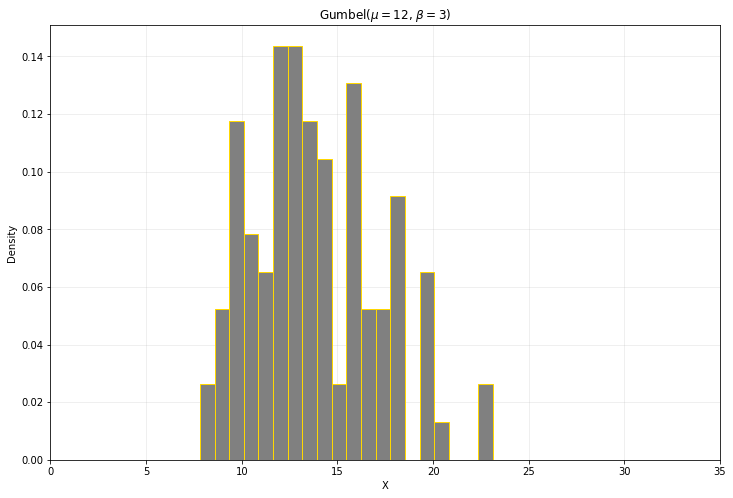

In [65]:
mu = 12
beta = 3
n_sample = 100
x = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n_sample)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
plt.hist(x, color="grey",edgecolor="gold", bins=20, density=True)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlabel('X')
ax.set_ylabel('Density')
ax.set_title(r'Gumbel($\mu=${}, $\beta=${})'.format(mu,beta))
plt.xlim([0,35])
plt.show()

**Part B:** Look up the analytical mean and variance of the Gumbel distribution with parameters $\mu=12$ and $\beta=3$ and calculate them here by hand.  Note that the Euler–Mascheroni constant can be accessed via `np.euler_gamma`. 

Use the empirical mean from your sample in **Part A**, and the true variance of the Gumbel distribution to compute by hand a 99% confidence interval for the mean.

In [66]:
print(np.euler_gamma)
print(np.mean(x))

0.5772156649015329
13.838244643272969


$E[X]=\mu + \beta \gamma=12+3*0.05772=13.7316$<br>
$Var(X)=\frac{\pi^2}{6} \beta^2=\frac{\pi^2}{6}*9=4.9346$<br>
$CI=[13.293-2.58\sqrt{\frac{4.9345}{100}},13.293+2.58\sqrt{\frac{4.9345}{100}}]= [12.7205,13.8667]$

**Part C:  A theoretical interlude.** When Stella O'Flaherty (the famous octopus) ran her solution code for **Part B**, she obtained a 99% confidence interval of $[12.73,  14.72]$ for the mean of the $Gum(\mu=12, \beta=3)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 99% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gum(\mu=12, \beta=3)$ distribution, you could say there is a 99% chance that its true mean falls between 12.73 and 14.72.

**(ii)** If a class of 100 students all construct 99% confidence intervals for the mean of the $Gum(\mu=12, \beta=3)$ distribution, then we expect about 99 of their CIs to contain the true mean, and about 1 of them to miss the true mean.

**(iii)** There is a 99% probability that any given random variable sampled from $Gum(\mu=12, \beta=3)$ will be between 12.73 and 14.72.

i)This is incorrect, CI is not related to any chance<br>
ii)This is correct, CI is related to the true population mean<br>
iii)This is incorrect, CI is used with sampling for the mean, but not for actual elements in the population.

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gumbel distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gumbel distribution with parameters $\mu=12$ and $\beta=3$.  For each random sample, compute the 75% confidence interval for the mean. Note that you actually know that the variance for the true population distribution is, $\sigma^2$.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals black if they cover the true mean, and red if they don't.  

Be sure to leave this cell executed before turning in your assignment!

Percent CI crossing mean: =0.742


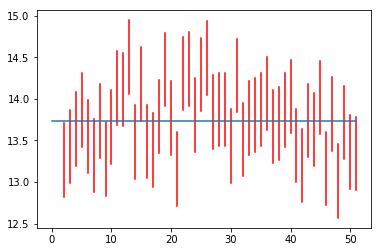

In [87]:
def confidence_intervals(m=500, n=100):
    ex=12+(3*np.euler_gamma)
    vx=((np.pi*3)**2)/6
    z=stats.norm.ppf(1-(1-0.75)/2)
    c=0
    ci=[]
    for i in range(m):
        x=stats.gumbel_r.rvs(loc=mu, scale=beta,size=n)
        lower=np.mean(x) - z*(np.sqrt(vx/n))
        upper=np.mean(x) + z*(np.sqrt(vx/n))
        if (lower<=ex) and (ex<=upper):
            c=c +1
        ci.append([lower,upper])
        
    print("Percent CI crossing mean: ="+str(c/m))
    
    a=1
    
    for i in np.random.choice(range(m),size=50,replace=False):
        if (lower<ex and upper>ex):
            color1='red'
        else:
            color1='black'
        plt.plot([a+1,a+1], ci[i], color=color1)
        a+=1
    plt.plot([0,51],[ex,ex])
    
        
confidence_intervals()

**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

This proportion of confidence intervals makes sense, as we see at least 75 percent(a little more in this simulation) of the generated CI's contain the true mean, which is the definition of a 75% CI.

---

<a id='p4'></a>
[Back to top](#top)

### Freethrow Throwbacks
***

Keep your skills sharp by answering these straightforward questions.

**Part A**: <font color='green'>Your Michael Jordan in his prime...It's the sixth game of the 1998 NBA Finals and Byron Russel fouls you, but when you step up to take the freethrow, your transported to a CSCI 3022 classroom. Solve the following to "make" the freethrow:</font>

You have a shuffled deck of cards. It includes the usual 52 cards and 2 Jokers. You flip over the cards one by one, without replacing them in the deck. You count how many cards you'll have to flip until you flip four of the following five cards: the six of hearts, the eight of diamonds, the king of clubs, and both of the jokers.  You repeat this many times. 

Simulate this process at least 25000 times. Plot a histogram with binsize=1 of the outcomes, in lightgrey with white outline. Compute the mean, median, and mode for this dataset, indicate them on the plot using a line, with linstyles of green dashed, red dotted, and black solid, respectively. Use a legend to label your histogram (of the distribution of flips), mean, median. Does this data look positively or negatively skewed? Explain below in a markdown cell, talk about the mean, median, and the shape of the histogram in your answer.

Text(0,0.5,'Frequency')

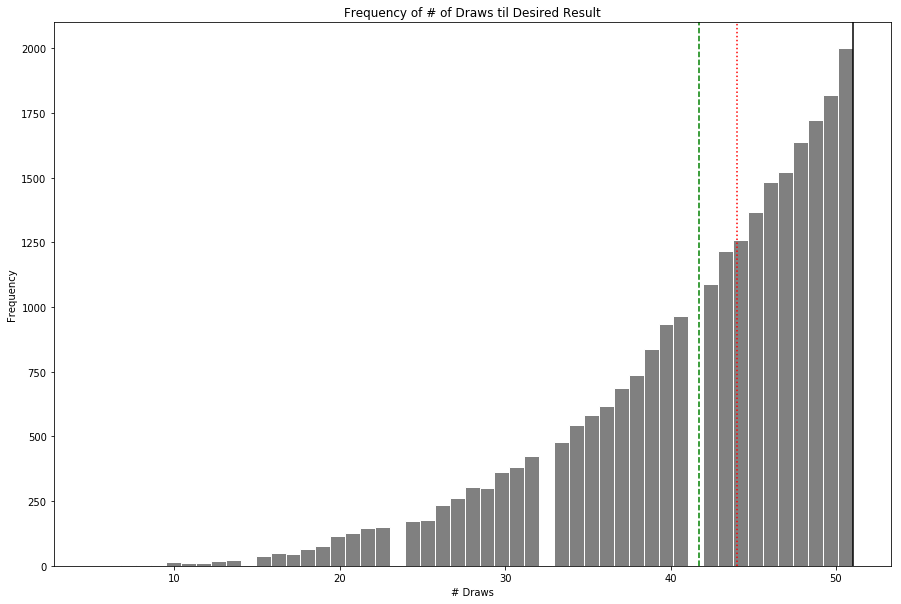

In [68]:
import random

cards=['Ah','2h','3h','4h','5h','6h','7h','8h','9h','10h','Jh','Qh','Kh'
       'Ad','2d','3d','4d','5d','6d','7d','8d','9d','10d','Jd','Qd','Kd'
       'Ac','2c','3c','4c','5c','6c','7c','8c','9c','10c','Jc','Qc','Kc'
       'As','2s','3s','4s','5s','6s','7s','8s','9s','10s','Js','Qs','Ks','Joker1','Joker2']

def simDraws(cards):
    wantedDraws=0
    totalDraws=0
    while wantedDraws!=4:
        card=random.sample(cards,1)
        if card in [['6h'],['8d'],['Kc'],['Joker1'],['Joker2']]:
            wantedDraws+=1
        totalDraws+=1
        cards.remove(card[0])
    return totalDraws

numDraws=[]

for i in range(25000):
    cards2=['Ah','2h','3h','4h','5h','6h','7h','8h','9h','10h','Jh','Qh','Kh'
       'Ad','2d','3d','4d','5d','6d','7d','8d','9d','10d','Jd','Qd','Kd'
       'Ac','2c','3c','4c','5c','6c','7c','8c','9c','10c','Jc','Qc','Kc'
       'As','2s','3s','4s','5s','6s','7s','8s','9s','10s','Js','Qs','Ks','Joker1','Joker2']
    draws=simDraws(cards)
    numDraws.append(draws)
    cards=cards2
    draws=0

def most_frequent(List): 
    counter = 0
    num = List[0] 
      
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
  
    return num 

meanDraws=np.mean(numDraws)
medianDraws=np.median(numDraws)
modeDraws=most_frequent(numDraws)
numSeries=pd.Series(numDraws)

fig, ax = plt.subplots(figsize=(15,10))
ax.hist(numSeries,color ='grey',edgecolor='white',bins=51)
plt.axvline(x=meanDraws,color='green',linestyle='--')
plt.axvline(x=medianDraws,color='red',linestyle=':')
plt.axvline(x=modeDraws,color='black')
ax.set_title('Frequency of # of Draws until Desired Result')
ax.set_xlabel('# Draws')
ax.set_ylabel('Frequency')



This data is negatively skewed, as the mean is less then the median and there is a long flat tail to the left of the center.

***

**Part B**: <font color='green'> Now you're back up for another freethrow, but this time you've been transported to the third overtime of the famous [1976 NBA Finals Game Five](https://www.youtube.com/watch?v=3ZjNDvuMxzc). You line up for a freethrow, but oddly enough you're again transported back to CSCI 3022... Why does this keep happening? If you solve this problem, you make the freethrow:</font>

In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?

The width of a 99% confidence interval is greater than that of the width of a 95% confidence interval. Confidence intervals define a range where a given percentage of  CI's will include the true mean. This means that for a 95% confidence interval, %95 of CI's will contain the true mean, wheras with a 95% confidence interval, 4% more CI's of these CI's will contain the true mean. This difference of 4% is what we see as the different widths of the two intervals.

***

**Part C**: <font color='green'>The crowd is silent... Because there is no crowd... And it's not a basketball game...  You're Will Smith and it's 1998. You've got an important decision to make: You've been offered the lead role in both a sci-fi flick and a steampunk western action comedy. If you make this "freethrow", Will Smith takes the sci-fi role and stars in "The Matrix" as Neo. If you fail to solve this question, Will Smith makes the blunder of turning down the "Matrix" to appear in "Wild Wild West" and history remains unchanged.
</font>

Let $X$ be a normally-distributed random variable. You draw from it and get these values, stored in the numpy array **smith**, below. These represent the probabilities of him taking the role in the matrix, calculated by differant "statistical measures". Compute a 95% confidence interval for the _variance_.


In [69]:
import statistics
smith = np.array([0.67832,0.113,0.423,0.279,0.580,0.401,0.189, 0.198, 0.147, 0.103, 0.098])
var=statistics.variance(smith)
stdDev=math.sqrt(var)
mean=np.mean(smith)
alpha2=0.05/2

leftBound1=mean-(stats.norm.cdf(alpha2))*(stdDev/math.sqrt(n1))
rightBound1=mean+(stats.norm.cdf(alpha2))*(stdDev/math.sqrt(n1))
print("95% CI for smith variance: "+str([leftBound1,rightBound1]))


95% CI for smith variance: [0.27995101594780847, 0.3035617113249188]


Computed from var,std dev, alpha, and mean


***

**Part D**: <font color='green'>Now we're back to basketball...You're Askia Booker, former CU point guard. It's the [2013 KU game](https://www.youtube.com/watch?v=-ycTB27RlEc) and your take the ball with 2.7 seconds left. To sink the three and win the game, solve the following: </font>

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate? Explain.


We would rather have a low type 2 error, since we are looking to be safe. It is more acceptable to occasionally deem safe parts unsafe than it is to deem unsafe parts safe.


***

**Part E**: <font color='green'>Well, we haven't stopped time traveling yet.... But now we're in the soccor world. Your a striker in the [1994 Fifa World Cup Final](https://www.youtube.com/watch?v=pLPM_JSbGvI) between Brazil and Italy. Solve this problem to make a penalaty kick during the final shootout:</font>

You measure 49 suckers from baby reef octopuses and find that they are, on average, 47.2 mm wide, with a standard devaition of 29.2mm. 

Then you measure 65 suckers from from baby dumbo octopuses and find that they are, on average, 63.9 mm wide, with a standard deviation of 19.6 mm. 

Is there statistical evidence at the 0.025 significance level that the true mean of baby dumbo octopus sucker width exceeds the true mean of baby reef octopus sucker width by more than 7 mm?  Use a test of your choice.

Null Hypothesis, H0:<br>
$\mu_2-\mu_1=7$<br>
Alternative Hypothesis, Hi:<br>
$\mu_2-\mu_1>7$<br>
Calculate Test Statistic:<br>
$\frac{(x1-x2)-7}{\sqrt((\frac{s1^2}{n1})^2+(\frac{s2^2}{n2})^2)}$<br><br>
$=\frac{(63.9-47.2)-7}{\sqrt(17.4+5.91)}$<br>
$=\frac{9.7}{4.8281}$<br>
$t=2.01$<br>
From the t-table:<br>
P value=0.0235<br>
0.0235<0.025, therefore reject H0 in favor of Hi
